In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [100]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, RobustScaler

In [102]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

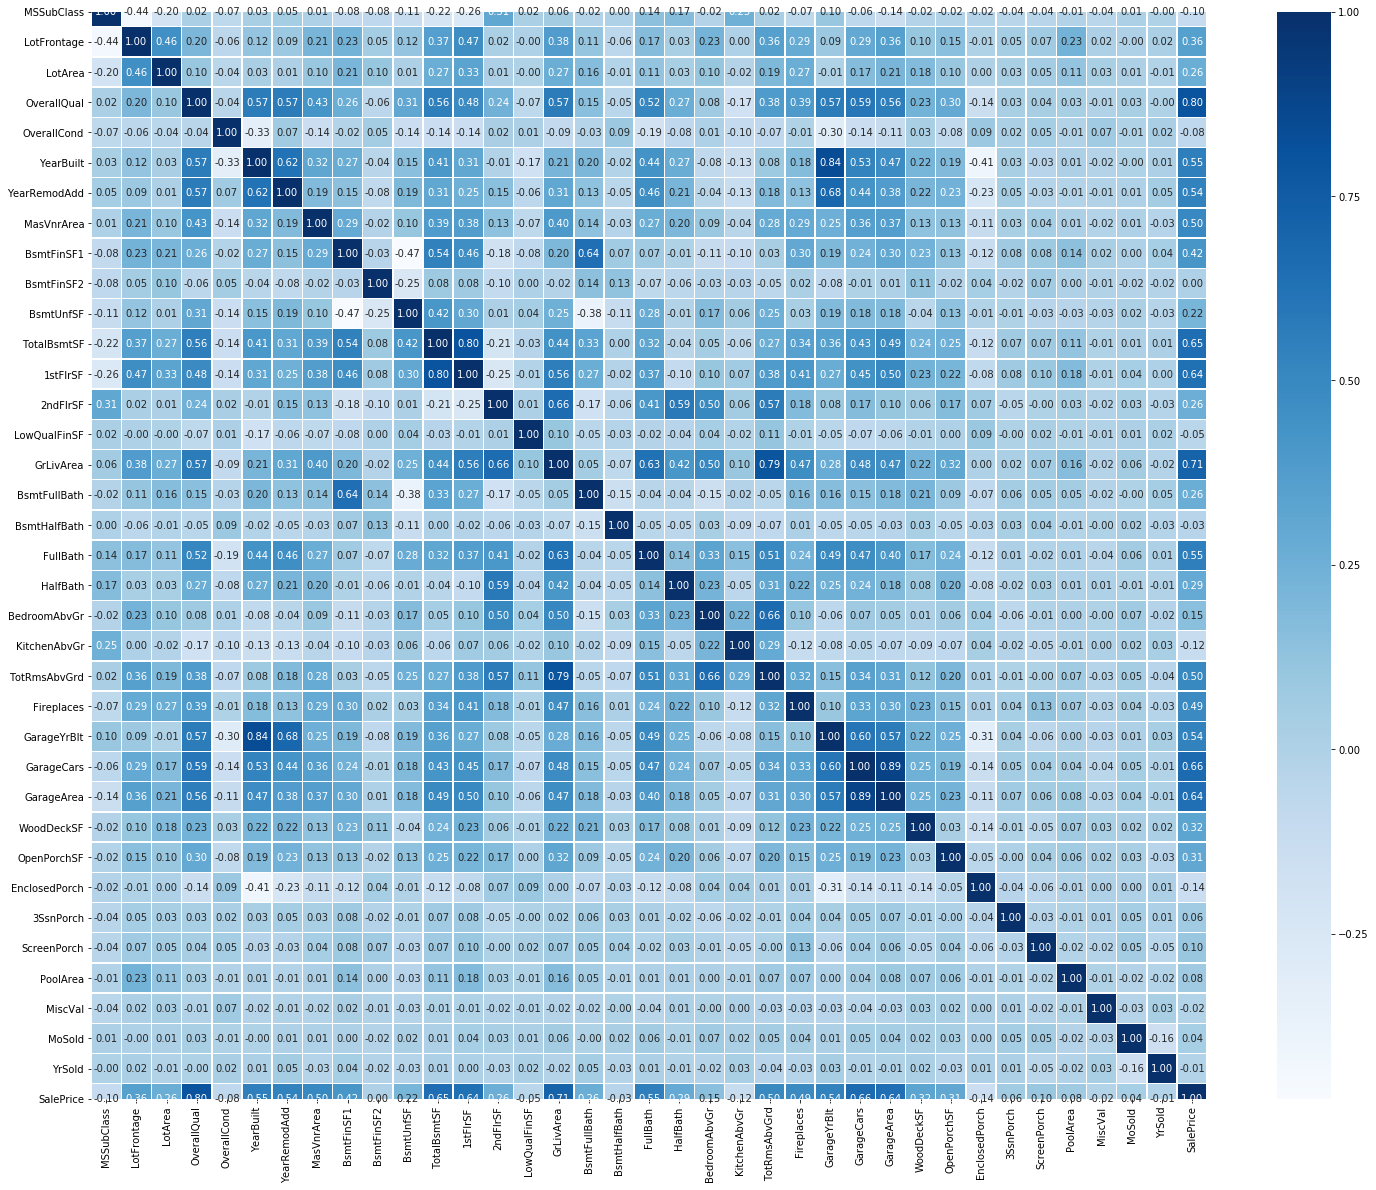

In [17]:
plt.figure(figsize=(25, 20))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap="Blues")

In [103]:
X = train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
          'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y = train['SalePrice']
X.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,
1,6,1988,2007,260.0,808.0,880.0,1680,1680,2,5,1,1988.0,2.0,540.0,292,44
2,6,1971,1971,0.0,282.0,981.0,981,981,1,5,0,1979.0,2.0,576.0,0,312
3,7,2002,2002,99.0,922.0,1494.0,1494,1494,2,6,1,2002.0,2.0,530.0,192,36
4,7,1997,1998,0.0,0.0,569.0,854,1694,2,6,1,1997.0,1.0,434.0,0,382
5,5,1968,1993,0.0,570.0,1461.0,1721,1721,2,7,1,1968.0,2.0,440.0,0,96


In [104]:
# 결측치 하나 최빈값으로 채움
X['BsmtFinSF1'].fillna(0.0, inplace=True)
# 결측치를 평균값으로 채움
X['TotalBsmtSF'].fillna(1045.0, inplace=True)
# 결측치를 최빈값으로 채움
X['GarageCars'].fillna(2.0, inplace=True)
# 결측치를 평균값으로 채움
X['GarageArea'].fillna(473.0, inplace=True)
# 결측치가 존재하는 MasVnrArea, GarageYrBlt 제거
X.drop(['MasVnrArea', 'GarageYrBlt'], axis=1, inplace=True)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
col = X.columns

In [67]:
for i in range(len(col)):
    for j in range(i, len(col)):
        X[col[i]+'x'+col[j]] = X[col[i]]*X[col[j]]

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
X_result = test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
          'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [68]:
col = X_result.columns

In [69]:
for i in range(len(col)):
    for j in range(i, len(col)):
        X_result[col[i]+'x'+col[j]] = X_result[col[i]]*X_result[col[j]]

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
X_total = pd.concat([X, X_result])
sc = MinMaxScaler()
sc.fit(X_total)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [109]:
X_train.shape

(1225, 14)

In [110]:
y_train.shape

(1225,)

In [111]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_result_std = sc.transform(X_result)

## RandomForestRegressor

In [124]:
rm = RandomForestRegressor(n_estimators=300, criterion='mse', n_jobs=-1, max_depth=None)

In [125]:
rm.fit(X_train_std, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [126]:
y_pred = pd.DataFrame(rm.predict(X_test_std))
y_pred.columns=['예측']

In [127]:
mean_squared_error(y_test, y_pred)**0.5

23699.26696766045

In [130]:
for e in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    rm = RandomForestRegressor(n_estimators=e, criterion='mse', n_jobs=-1, max_depth=None)
    rm.fit(X_train_std, y_train)
    print(e, mean_squared_error(y_train, y_train)**0.5)
    print(e ,mean_squared_error(y_test, rm.predict(X_test_std))**0.5)

100 0.0
100 23690.306062484273
200 0.0
200 24177.70708082291
300 0.0
300 23982.743359330954
400 0.0
400 23912.84105019413
500 0.0
500 23914.129381673665
600 0.0
600 23597.184009083376
700 0.0
700 23838.556583014128
800 0.0
800 23687.906502657705
900 0.0
900 23852.6547054649
1000 0.0
1000 23933.3673357101


### KNN

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
train_acc = []
test_acc = []
for i in range(1,50):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train_std, y_train)
    train_acc.append(math.sqrt(mean_squared_error(y_train, knr.predict(X_train_std))))
    test_acc.append(math.sqrt(mean_squared_error(y_test, knr.predict(X_test_std))))
    print(i, math.sqrt(mean_squared_error(y_test, knr.predict(X_test_std))))

1 37655.67313356418
2 34840.338864810445
3 33491.33745773034
4 33582.80801150164
5 32722.092240085807
6 32088.145294104685
7 32317.974957065973
8 32713.381833625208
9 32696.03126457009
10 32081.447298870688
11 32580.160457061433
12 32781.702723172464
13 33102.96954156046
14 33371.62298516606
15 33816.92114122455
16 33835.27972206619
17 34042.009870931826
18 34136.456148419136
19 34209.395878061034
20 34620.282483322386
21 34836.13877727311
22 34742.69278408718
23 34636.27632040977
24 34810.13257510179
25 35125.87114215894
26 35061.45638880031
27 35074.69444524309
28 35291.71995979315
29 35491.84774862293
30 35689.34061350247
31 35743.3751706378
32 35936.1292806776
33 36151.044194194204
34 36143.716300858156
35 36140.41566668201
36 36302.06230255648
37 36357.743931641715
38 36456.76128753393
39 36675.41653036472
40 36677.357468316965
41 36853.334241164834
42 36950.128535947646
43 36992.264216171956
44 37097.44424402017
45 37173.11009903683
46 37185.169408001464
47 37218.67637970285
48 3

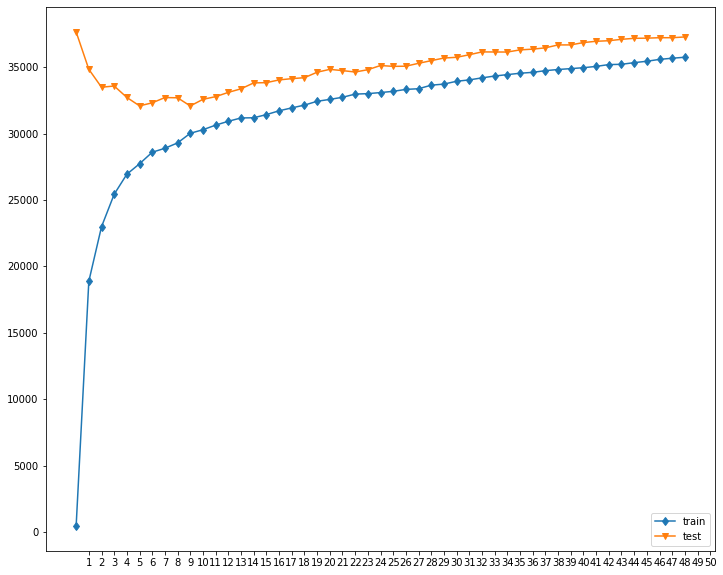

In [78]:
plt.figure(figsize=(12,10))
plt.xticks(np.linspace(1, 50, 50))
plt.plot(train_acc, label='train', marker='d')
plt.plot(test_acc, label='test', marker='v')
plt.legend()

In [80]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(X_train_std, y_train)
print(math.sqrt(mean_squared_error(y_test, knr.predict(X_test_std))))

32317.974957065973


### Lasso

In [95]:
for a in [1, 0.1, 0.01, 0.001, 0.0001]:
    model = Lasso(alpha=a, max_iter=100000)
    model.fit(X_train_std, y_train)
    print("훈련데이터 :", a, model.score(X_train
                                    _std, y_train))
    print("테스트데이터 :", a, model.score(X_test_std, y_test))

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144476340161.94824, tolerance: 733799955.9723321
  positive)


훈련데이터 : 1 0.9325125502255989
테스트데이터 : 1 0.9091740316949302


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235037471189.49512, tolerance: 733799955.9723321
  positive)


훈련데이터 : 0.1 0.9325709274579622
테스트데이터 : 0.1 0.9081018497193069


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246284635171.34726, tolerance: 733799955.9723321
  positive)


훈련데이터 : 0.01 0.9325471956992476
테스트데이터 : 0.01 0.907937580444592


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247374430057.20483, tolerance: 733799955.9723321
  positive)


훈련데이터 : 0.001 0.932544545379826
테스트데이터 : 0.001 0.9079205264768234
훈련데이터 : 0.0001 0.9325442781106071
테스트데이터 : 0.0001 0.9079188120001862


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247483070459.04657, tolerance: 733799955.9723321
  positive)


In [90]:
print(model.coef_)

[-3.75203784e+05 -5.71893370e+04 -6.19688349e+05 -4.06211343e+04
 -1.10862104e+05 -1.40944998e+05 -1.45546527e+05 -5.24521358e+05
  2.17552268e+05  2.63046507e+05 -8.21916919e+04 -2.26751642e+04
 -1.23500202e+05 -1.18849807e+05 -9.31449042e+03 -1.22876093e+05
  4.94327927e+05  3.33207045e+04  1.36052372e+04  1.65036624e+04
  8.07248033e+04 -2.41462205e+04  3.48184841e+01  1.72631229e+04
 -3.08420817e+04  4.04690185e+04 -7.83637700e+03 -3.78710527e+03
 -1.27211221e+05  3.06995901e+05  3.45974898e+03  2.03252563e+05
  4.34788625e+03  2.93864873e+05 -1.25197006e+05  3.86905496e+03
 -3.76322406e+05  2.14873332e+03 -2.56909140e+04  2.40524653e+05
  1.06635750e+05  4.60571040e+05  3.67842132e+04 -7.43182309e+04
  1.47917908e+05 -1.45104495e+05  6.79358086e+05 -2.15426116e+05
  7.60247992e+04  9.37224198e+04  4.08097195e+04 -1.04348994e+05
  8.85378002e+03 -6.88615755e+03 -1.65817799e+04  2.02299018e+04
 -1.78975840e+04  1.47698437e+04 -5.23195053e+03  1.46006104e+03
 -1.36690982e+04  1.35123

In [91]:
print('훈련 세트 점수 : {:.2f}'.format(math.sqrt(mean_squared_error(y_train, model.predict(X_train_std)))))
print('테스트 세트 점수 : {:.2f}'.format(math.sqrt(mean_squared_error(y_test, model.predict(X_test_std)))))
print('사용한 특성 수 : ', np.sum(model.coef_ != 0))
#y_pred = model.predict(X_test_std)

훈련 세트 점수 : 20101.15
테스트 세트 점수 : 24728.55
사용한 특성 수 :  119


### 선형회귀

In [27]:
from sklearn.linear_model import LinearRegression
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

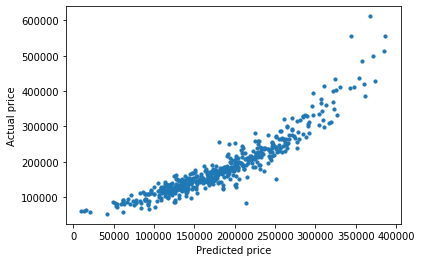

In [29]:
p = lr.predict(X_test)
plt.scatter(p, y_test, s=10)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")

plt.show()

In [30]:
math.sqrt(mean_squared_error(y_test, p))

31672.71411633391

## 제출용

In [120]:
y_pred = rm.predict(X_result_std)

In [121]:
y_pred = pd.DataFrame(y_pred, columns=['SalePrice'])

In [122]:
y_pred

,SalePrice
0,252354.888510
1,137966.343002
2,216919.064696
3,222082.342617
4,156087.280732
5,123776.888403
6,83055.420171
7,123132.448038
8,132618.343480
9,148374.785275


In [123]:
result = pd.concat([pd.DataFrame(list(test.index), columns=['Id']), y_pred], axis=1)
result.to_csv('./submission.csv', index=False)